### DATA PT14-extra - Proyecto final - Grupo 3
#### EDA de los estados de California (CA) y Nevada(NV)

In [1]:
#import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import os
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

#### Datos de Google Maps

El control de la calidad de los datos de los archivos de Google Maps se hizo en las notebooks llamadas metadata_sitios y metadata_reviews. </br>
A continuación se detallarán brevemente los hallazgos. </br>

Se leyeron los datos de reviews de los estados de California y Nevada. </br> 
Se encontraron gran cantidad de reviews duplicadas por las columnas 'user_id', 'gmap_id', 'time' (que formarían la clave de ese archivo). Se eliminaron. </br> 
Cada uno de estos dataframes se unieron con el de pizzerias para el departamento de CA y NV para conocer el nombre del local y los otros datos de cada pizzeria. </br>


In [2]:
# Leo los archivos con datos de Google Maps
# How to read a Parquet file into Pandas DataFrame?
df_gm_pizza_CANV = pd.read_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Maps\df_mt_pizza_CANV_sindup_verif_coord.parquet' , engine='fastparquet')
df_gm_pizza_CANV_rev = pd.read_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Maps\df_pizza_CANV_rev.parquet' , engine='fastparquet') 

In [3]:
# Eliminar filas donde state es 'united'
df_gm_pizza_CANV = df_gm_pizza_CANV[df_gm_pizza_CANV['state'].str.lower() != 'united']


#### Análisis exploratorio de los datos de Google Maps de pizzerías

In [4]:
print(df_gm_pizza_CANV[['avg_rating' , 'num_of_reviews']].describe())

        avg_rating  num_of_reviews
count  2287.000000     2287.000000
mean      4.074027       83.564058
std       0.516397       84.324962
min       1.000000        1.000000
25%       3.800000       23.500000
50%       4.100000       58.000000
75%       4.400000      118.000000
max       5.000000      936.000000


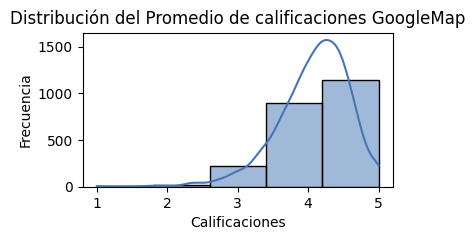

In [5]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(df_gm_pizza_CANV['avg_rating'], bins=5, kde=True, color='#4575b4')
plt.title("Distribución del Promedio de calificaciones GoogleMap")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

Las posibles calificaciones estan en un rango de 1 a 5. Como mencionamos antes el promedio de calificaciones para las pizzerias de los estados de NJ y NY es de 4.1 +- 0.5 sugiriendo una tendencia positiva. </br>
Los locales tienen en promedio 83 reviews cada uno. Teniendo 1 review el que menos tiene y 936 reviews el que tiene más.

In [6]:
print('Estado de CA: \n', df_gm_pizza_CANV.loc[df_gm_pizza_CANV['state'] == 'CA', ['avg_rating', 'num_of_reviews']].describe() , '\n')
print('Estado de NV: \n', df_gm_pizza_CANV.loc[df_gm_pizza_CANV['state'] == 'NV', ['avg_rating', 'num_of_reviews']].describe())

Estado de CA: 
         avg_rating  num_of_reviews
count  2087.000000     2087.000000
mean      4.086679       84.087207
std       0.509239       83.141126
min       1.000000        1.000000
25%       3.800000       24.000000
50%       4.200000       58.000000
75%       4.400000      118.000000
max       5.000000      936.000000 

Estado de NV: 
        avg_rating  num_of_reviews
count  200.000000      200.000000
mean     3.942000       78.105000
std      0.570758       95.873734
min      1.300000        1.000000
25%      3.600000       18.000000
50%      4.000000       48.000000
75%      4.325000       98.000000
max      5.000000      922.000000


Si discriminamos por estado vemos que para las pizzerias del estado de CA el promedio de calificaciones es de 4.1 +- 0.51 y para el estado de NV 3,94 +-0,57.</br>

In [7]:
print('Estado de CA: \n', 
      df_gm_pizza_CANV.loc[
          (df_gm_pizza_CANV['state'] == 'CA') & 
          (df_gm_pizza_CANV['business_name'].str.contains('pizza', case=False, na=False)), 
          ['avg_rating', 'num_of_reviews']
      ].describe(), '\n')

print('Estado de NV: \n', 
      df_gm_pizza_CANV.loc[
          (df_gm_pizza_CANV['state'] == 'NV') & 
          (df_gm_pizza_CANV['business_name'].str.contains('pizza', case=False, na=False)), 
          ['avg_rating', 'num_of_reviews']
      ].describe())

Estado de CA: 
         avg_rating  num_of_reviews
count  1661.000000     1661.000000
mean      4.053101       88.169175
std       0.506997       82.539459
min       1.000000        1.000000
25%       3.800000       26.000000
50%       4.100000       68.000000
75%       4.400000      128.000000
max       5.000000      763.000000 

Estado de NV: 
        avg_rating  num_of_reviews
count  144.000000      144.000000
mean     3.938194       87.062500
std      0.516307      106.569339
min      2.800000        2.000000
25%      3.600000       18.000000
50%      4.000000       66.000000
75%      4.300000      108.000000
max      5.000000      922.000000


In [8]:
# Filtro de pizzerías con al menos 100 reviews y cuyo nombre contenga "pizza"
filtro_pizza = (
    (df_gm_pizza_CANV['num_of_reviews'] >= 100) & 
    (df_gm_pizza_CANV['business_name'].str.contains('pizza', case=False, na=False))
)

# Las 10 pizzerías con mejor calificación
top_pizza = df_gm_pizza_CANV[filtro_pizza].sort_values(by='avg_rating', ascending=False).head(10)

# Las 10 pizzerías con peor calificación
worst_pizza = df_gm_pizza_CANV[filtro_pizza].sort_values(by='avg_rating', ascending=True).head(10)

print("Las 10 mejores pizzerías:\n", top_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']], '\n')
print("Las 10 pizzerías con menor calificación:\n", worst_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']])


Las 10 mejores pizzerías:
                             business_name  avg_rating  num_of_reviews state
index                                                                      
2990259     Gridiron Pizza #3 At The Lake         4.9             525    CA
547319            Persepolis Pizza & Subs         4.9             186    CA
2303535                         701 Pizza         4.8             192    CA
430923   Powerhaus Wholesome Pizza & Eats         4.8             183    CA
2965735                 North Beach Pizza         4.8             153    CA
2540718        B & J's Pizza & Sandwiches         4.7             118    CA
373314                       Harbor Pizza         4.7             118    CA
2742042                      Fiesta Pizza         4.7             238    CA
3005254         Smokehaus Pizza and Pints         4.7             187    CA
706591                        Gio's Pizza         4.7             168    CA 

Las 10 pizzerías con menor calificación:
                 b

Si clasificamos las pizzerias de acuerdo a su calificación observamos que las 10 pizzerias mejor calificadas son locales únicos, no pertenecen a una cadena, tienen un promedio entre 4.7 y 4.9 todos en el estado de california. </br>
Respecto de las pizzerias peor calificadas se observa que su calificación está entre 2.4 y 3.1, pertenecen a dos cadenas muy conocidas (Domino's Pizza y Pizza Hut).

In [9]:
# Filtro: mínimo 50 reviews y el nombre contenga "pizza"
filtro_pizza = (
    (df_gm_pizza_CANV['num_of_reviews'] >= 50) & 
    (df_gm_pizza_CANV['business_name'].str.contains('pizza', case=False, na=False))
)

# Las 10 pizzerías con mejor calificación
top_pizza = df_gm_pizza_CANV[filtro_pizza].sort_values(by='avg_rating', ascending=False).head(10)

# Las 10 pizzerías con peor calificación
worst_pizza = df_gm_pizza_CANV[filtro_pizza].sort_values(by='avg_rating', ascending=True).head(10)

print("Las 10 mejores pizzerías:\n", top_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']], '\n')
print("Las 10 pizzerías con menor calificación:\n", worst_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']])


Las 10 mejores pizzerías:
                             business_name  avg_rating  num_of_reviews state
index                                                                      
2990259     Gridiron Pizza #3 At The Lake         4.9             525    CA
297649          Lunas Pizza Bar and Grill         4.9              68    CA
2948717     Donatello's Take & Bake Pizza         4.9              78    CA
547319            Persepolis Pizza & Subs         4.9             186    CA
2569450         The Original Pizza Presto         4.8              74    CA
2605905                      Pizza Grande         4.8              53    CA
1869804            Niko's Pizza Las Vegas         4.8              85    NV
423774                          Pizzaleah         4.8              79    CA
430923   Powerhaus Wholesome Pizza & Eats         4.8             183    CA
403817                      Pizza Sociale         4.8              88    CA 

Las 10 pizzerías con menor calificación:
                  

Cantidad de pizzerías con reviews GoogleMap por estado:
 state
CA    2087
NV     200
Name: count, dtype: int64


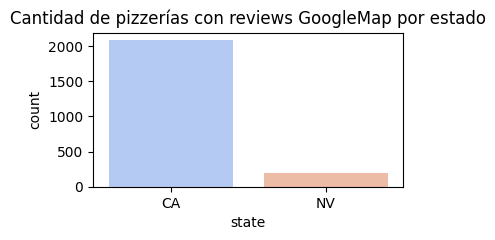

In [10]:
# Contar el número de pizzerías por estado
state_counts = df_gm_pizza_CANV['state'].value_counts()

# Imprimir
print("Cantidad de pizzerías con reviews GoogleMap por estado:\n", state_counts)

plt.figure(figsize=(4,2))
sns.countplot(data=df_gm_pizza_CANV, x="state", palette="coolwarm")
plt.title("Cantidad de pizzerías con reviews GoogleMap por estado")
plt.show()

Observamos que aparecen datos de 2087 pizzerias en CA y de 200 pizzerias en NV

##### Analizaremos ahora los datos de reviews de Google Maps

In [11]:
df_gm_pizza_CANV_rev['date'].agg(['min', 'max'])

min   2007-08-25 23:57:12.717
max   2021-08-28 15:58:09.089
Name: date, dtype: datetime64[ns]

Hay reviews de google maps desde 25/08/2007 hasta 28/08/2021. Por ahora no eliminaremos reviews antiguas. Revisamos la cantidad de reviews para cada año.

In [12]:
#  Extraer el año de la columna 'date'
df_gm_pizza_CANV_rev['year'] = df_gm_pizza_CANV_rev['date'].dt.year

# Contar el número de reseñas por año
reviews_per_year = df_gm_pizza_CANV_rev['year'].value_counts().sort_index()

In [13]:
reviews_per_year.describe

<bound method NDFrame.describe of year
2007        1
2008        3
2009        4
2010       57
2011       93
2012      121
2013      151
2014      204
2015      453
2016     1771
2017     4018
2018     8287
2019    10514
2020     5636
2021     3592
Name: count, dtype: int64>

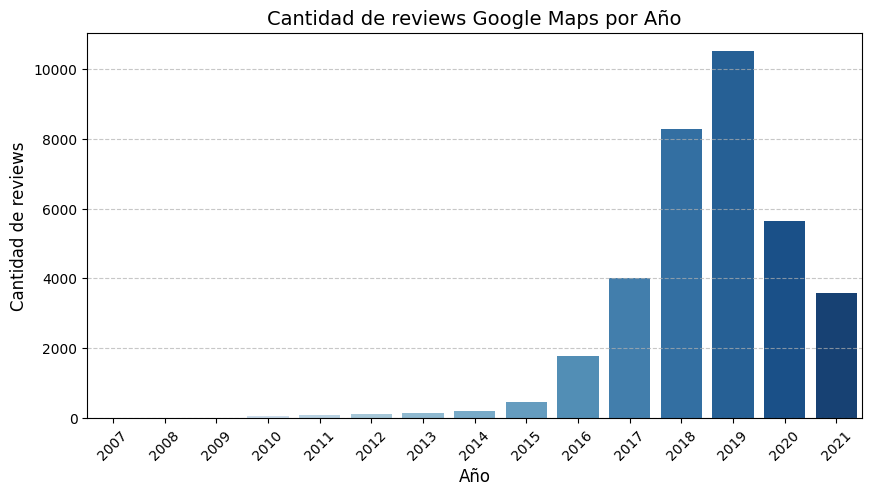

In [14]:
# Grafico la cantidad de reviews para cada año desde 2004 a 2021

plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_per_year.index, y=reviews_per_year.values, palette='Blues')

plt.title('Cantidad de reviews Google Maps por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de reviews', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Observamos que hay mayor cantidad de reseñas a partir del año 2017. El año con más reseñas es 2019.

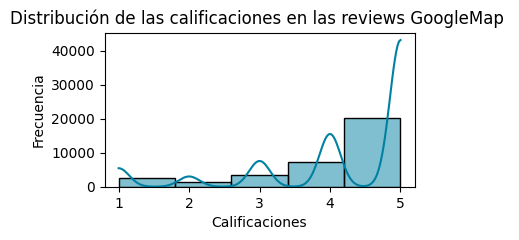

In [15]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(df_gm_pizza_CANV_rev['rating'], bins=5, kde=True, color='#0180a2')
plt.title("Distribución de las calificaciones en las reviews GoogleMap ")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

En las reviews la mayoría de las pizzerías tienen calificaciones altas, entre 4 y 5.

In [16]:
pizzeria_stats = df_gm_pizza_CANV_rev.groupby('business_name').agg(
    num_reviews=('rating', 'count'),  # Count reviews
    avg_rating=('rating', 'mean')  # Average rating
).reset_index()

top_pizzeria_stats = pizzeria_stats.sort_values(by='num_reviews', ascending=False).head(10)

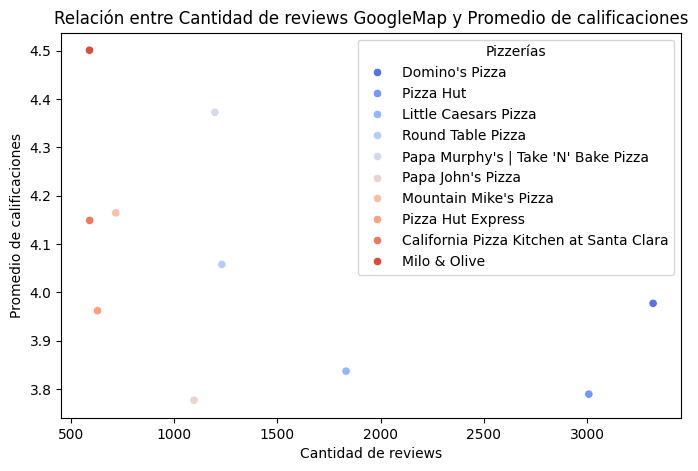

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data= top_pizzeria_stats, x="num_reviews", y="avg_rating", hue="business_name", palette="coolwarm")
plt.title("Relación entre Cantidad de reviews GoogleMap y Promedio de calificaciones")
plt.xlabel("Cantidad de reviews")
plt.ylabel("Promedio de calificaciones")
plt.legend(title="Pizzerías")
plt.show()

Podríamos decir que mayor cantidad de reviews indicaría mas popularidad. Pero pareciera que la relación entre cantidad de reviews y promedio de calificaciones sería inversamente proporcional. La calificación sería menor a mayor cantidad de reviews.

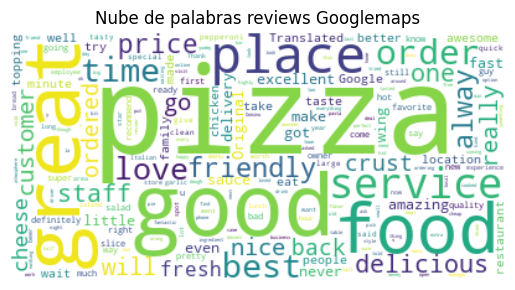

In [18]:
#Creating the text variable

df = df_gm_pizza_CANV_rev.dropna(subset=['text'])

text2 = " ".join(text for text in df['text'])

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title(f"Nube de palabras reviews Googlemaps")
plt.axis("off")
plt.show()

Observamos la nube de palabras creada a partir de los textos de las reviews para todas las pizzerias. Se destacan palabras positivas como good, great, nice, friendly, nice, excellent

</br>

#### Datos de Yelp

El control de la calidad de los datos de los archivos de Yelp se hizo en las notebooks llamadas Yelp Business y Yelp Business Reviews. </br>
A continuación se detallarán brevemente los hallazgos. </br>

Se eliminarons las columnas "is_open", "attributes",  "hours" que no se usarán. 103 filas tenían valor nulo en la columna categories. Estas filas se descartaron cuando se seleccionaron filas de acuerdo al valor de esa columna.
No se encontraron filas con valores duplicados. No se modificaron los tipos de datos. </br>
La columna star (calificación) tiene un rango de valores de 1.0 a 5.0. </br>
Se buscaron posibles outliers en la columna review_count. Se encontraron 3 locales con mas de 300 reseñas pero se supuso que eran valores posibles.</br>
Se eliminó la columna categories, luego de usarla.

In [19]:
# Leo los archivos con datos de Yelp
Yelp_pizza_CANV = pd.read_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Yelp\yelp_pizza_CANV.parquet' , engine='fastparquet')
Yelp_pizza_CANV_rev = pd.read_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Yelp\business_pizza_CANV_rev.parquet' , engine='fastparquet')

#### Análisis exploratorio de los datos de Yelp de pizzerías

In [20]:
print(Yelp_pizza_CANV[['stars' , 'review_count']].describe())

            stars  review_count
count  635.000000    635.000000
mean     3.374016     63.645669
std      0.823474    138.224143
min      1.000000      5.000000
25%      3.000000     14.000000
50%      3.500000     28.000000
75%      4.000000     67.000000
max      5.000000   2588.000000


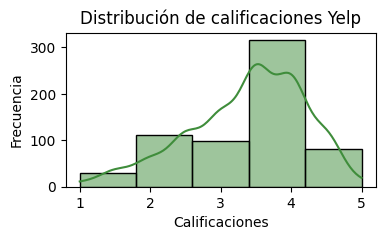

In [21]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(Yelp_pizza_CANV['stars'], bins=5, kde=True, color='#3f8d3b')
plt.title("Distribución de calificaciones Yelp")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

Las posibles calificaciones estan en un rango de 1 a 5. Como mencionamos antes el promedio de calificaciones para las pizzerias con reseñas sugiriendo una tendencia positiva. La mayoria de los locales tienen una calificación de alrededor de 4. </br>


In [24]:
# Estadísticas para todos los negocios cuyo nombre contenga "pizza"
print('Negocios con "pizza" en el nombre:\n', 
      Yelp_pizza_CANV.loc[
          Yelp_pizza_CANV['name'].str.contains('pizza', case=False, na=False), 
          ['stars', 'review_count']
      ].describe())


Negocios con "pizza" en el nombre:
             stars  review_count
count  367.000000    367.000000
mean     3.222071     51.455041
std      0.870198     99.418844
min      1.000000      5.000000
25%      2.500000     12.000000
50%      3.500000     23.000000
75%      4.000000     47.500000
max      5.000000   1293.000000


In [25]:
# Filtro: mínimo 20 reviews y nombre que contenga "pizza"
filtro_pizza = (
    (Yelp_pizza_CANV['review_count'] >= 20) & 
    (Yelp_pizza_CANV['name'].str.contains('pizza', case=False, na=False))
)

# Top 10 pizzerías con mejor calificación
top_pizza = Yelp_pizza_CANV[filtro_pizza].sort_values(by='stars', ascending=False).head(10)

# Top 10 pizzerías con peor calificación
worst_pizza = Yelp_pizza_CANV[filtro_pizza].sort_values(by='stars', ascending=True).head(10)

# Mostrar resultados
print("Las 10 mejores pizzerías:\n", top_pizza[['name', 'stars', 'review_count']], '\n')
print("Las 10 pizzerías con menor calificación:\n", worst_pizza[['name', 'stars', 'review_count']])


Las 10 mejores pizzerías:
                                  name  stars  review_count
index                                                     
43980          Baked Wood-fired Pizza    4.5          24.0
37260                    Faraci Pizza    4.5          40.0
30582  Sal & Joe's Pizza & Restaurant    4.5         117.0
9962       Salvo's Pizza of Hermitage    4.5          97.0
8260             Calusa Pizza & Craft    4.5          30.0
53245          Enzo's Pizza And Pasta    4.5          29.0
39304                      Pizza Luna    4.5         251.0
83283      Doliva Evoo Pizza & Grill     4.5          83.0
88976                      Rize Pizza    4.5         134.0
69057      Rick's Pizza, Beer, & More    4.5         214.0 

Las 10 pizzerías con menor calificación:
                            name  stars  review_count
index                                               
28853                 Pizza Hut    1.0          22.0
131884           Domino's Pizza    1.0          33.0
25570    

Como ya habíamos observado en el análisis de los locales de google maps, si clasificamos las pizzerías de acuerdo a su calificación observamos que las 10 pizzerias mejor calificadas son locales únicos, no pertenecen a una cadena, tienen un promedio de 4.5 </br>
Respecto de las pizzerias peor calificadas se observa que su calificación está entre 1.0 y 1.5

In [26]:
# Las 10 pizzerías con mejor calificación (mínimo 10 reviews y nombre contenga "pizza")
top_pizza = Yelp_pizza_CANV[
    (Yelp_pizza_CANV['review_count'] >= 10) & 
    (Yelp_pizza_CANV['name'].str.contains('pizza', case=False, na=False))
].sort_values(by='stars', ascending=False).head(10)

print("Los 10 locales con 'pizza' en el nombre y mejores calificaciones:\n", top_pizza[['name', 'stars', 'review_count']])


Los 10 locales con 'pizza' en el nombre y mejores calificaciones:
                                   name  stars  review_count
index                                                      
51148                 Prospero's Pizza    5.0          11.0
3898                      Ramble Pizza    4.5          19.0
133715                    Roma's Pizza    4.5          83.0
137561         Liliana's Pizza & Grill    4.5          28.0
129398  Manhattan Famous Pizza & Gyros    4.5          43.0
9962        Salvo's Pizza of Hermitage    4.5          97.0
30582   Sal & Joe's Pizza & Restaurant    4.5         117.0
103613               Five Points Pizza    4.5        1293.0
53881                        MOD Pizza    4.5         114.0
53245           Enzo's Pizza And Pasta    4.5          29.0


##### Analizaremos ahora los datos de reviews de Yelp

In [29]:
Yelp_pizza_CANV_rev['date_x'].agg(['min', 'max'])

min   2007-08-25 23:57:12.717
max   2021-08-28 15:58:09.089
Name: date_x, dtype: datetime64[ns]

Hay reviews de Yelp desde 25/08/2007 hasta 28/08/2021. Revisamos la cantidad de reviews para cada año.

In [31]:
#  Extraer el año de la columna 'date'
Yelp_pizza_CANV_rev['year'] = Yelp_pizza_CANV_rev['date_x'].dt.year

# Contar el número de reseñas por año
Yelp_reviews_per_year = Yelp_pizza_CANV_rev['year'].value_counts().sort_index()

In [32]:
Yelp_reviews_per_year.describe

<bound method NDFrame.describe of year
2007        1
2008        3
2009        4
2010       57
2011       93
2012      121
2013      151
2014      204
2015      453
2016     1771
2017     4018
2018     8287
2019    10514
2020     5636
2021     3592
Name: count, dtype: int64>

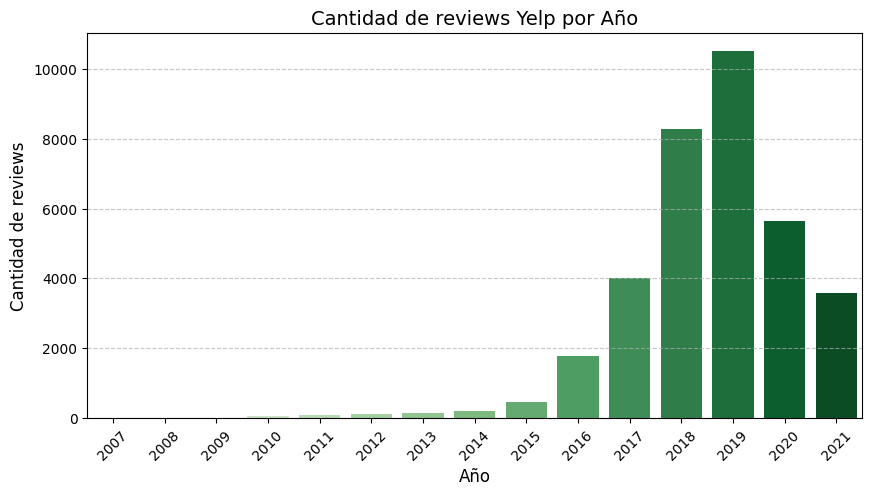

In [33]:
# Grafico la cantidad de reviews para cada año desde 2006 a 2022

plt.figure(figsize=(10, 5))
sns.barplot(x=Yelp_reviews_per_year.index, y=Yelp_reviews_per_year.values, palette='Greens')

plt.title('Cantidad de reviews Yelp por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de reviews', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Hay mayor cantidad de reseñas de Yelps a partir del año 2017. Disminuye la cantidad a partir de 2020. 

In [35]:
Yelp_pizza_CANV_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34905 entries, 0 to 34904
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gmap_id         34905 non-null  object        
 1   business_name   34905 non-null  object        
 2   address         34891 non-null  object        
 3   city            34905 non-null  object        
 4   state           34905 non-null  object        
 5   zip_code        34905 non-null  object        
 6   latitude        34905 non-null  float64       
 7   longitude       34905 non-null  float64       
 8   avg_rating      34905 non-null  float64       
 9   num_of_reviews  34905 non-null  int64         
 10  user_id_x       34905 non-null  float64       
 11  user_name       34905 non-null  object        
 12  rating          34905 non-null  float64       
 13  text_x          21393 non-null  object        
 14  date_x          34905 non-null  datetime64[ns]
 15  re

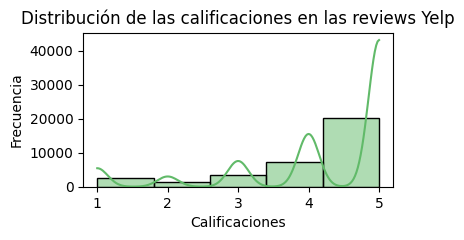

In [37]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(Yelp_pizza_CANV_rev['rating'], bins=5, kde=True, color='#61ba69')
plt.title("Distribución de las calificaciones en las reviews Yelp")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

Como sucedia con las reviews de GoogleMaps, en las reviews de Yelp la mayoría de las pizzerías tienen calificaciones altas, entre 4 y 5.

In [39]:
pizzeria_stats = Yelp_pizza_CANV_rev.groupby('business_name').agg(
    num_reviews=('rating', 'count'),  # Count reviews
    avg_rating=('rating', 'mean')  # Average rating
).reset_index()

top_pizzeria_stats = pizzeria_stats.sort_values(by='num_reviews', ascending=False).head(10)

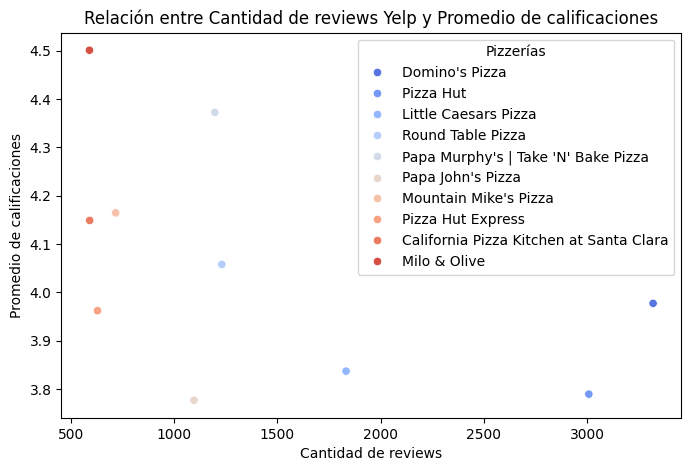

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(data= top_pizzeria_stats, x="num_reviews", y="avg_rating", hue="business_name", palette="coolwarm")
plt.title("Relación entre Cantidad de reviews Yelp y Promedio de calificaciones")
plt.xlabel("Cantidad de reviews")
plt.ylabel("Promedio de calificaciones")
plt.legend(title="Pizzerías")
plt.show()

En el caso de Yelp podríamos decir que no se observa una correlación clara entre la cantidad de reviews y el promedio de calificaciones dados por cada usuario.

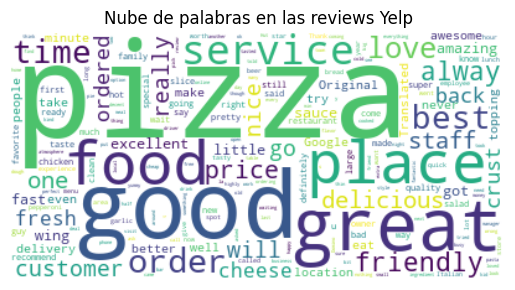

In [43]:
#Creating the text variable

df = Yelp_pizza_CANV_rev.dropna(subset=['text_x'])

text2 = " ".join(text for text in df['text_x'])

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title(f"Nube de palabras en las reviews Yelp")
plt.axis("off")
plt.show()

Observamos la nube de palabras creada a partir de los textos de las reviews para todas las pizzerias. Se destacan palabras positivas como good, great, service y delicious.  Podría haber menor variedad de palabras que en la nube de palabras de las reseñas de GoogleMpas porque la cantidad de reseñas analizadas es menor.